In [1]:
import tensorflow as tf
print(tf.__version__) 

2.3.0


In [2]:
import time

In [3]:
from tqdm import tqdm
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount("/content/drive")

dir = "/content/drive/My Drive/Colab Notebooks/THESIS"

Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/Colab Notebooks/THESIS/final/8k_2k/

/content/drive/My Drive/Colab Notebooks/THESIS/final/8k_2k


In [6]:
train_path = 'train'
valid_path = 'test'

In [7]:
IMAGE_SIZE = [227, 227]
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [8]:
print(image_files)

['train/p/p37.jpg', 'train/p/p3699.jpg', 'train/p/p370.jpg', 'train/p/p3700.jpg', 'train/p/p3701.jpg', 'train/p/p3702.jpg', 'train/p/p3703.jpg', 'train/p/p3704.jpg', 'train/p/p3705.jpg', 'train/p/p3706.jpg', 'train/p/p3707.jpg', 'train/p/p3708.jpg', 'train/p/p3709.jpg', 'train/p/p371.jpg', 'train/p/p3710.jpg', 'train/p/p3711.jpg', 'train/p/p3712.jpg', 'train/p/p3713.jpg', 'train/p/p3714.jpg', 'train/p/p3715.jpg', 'train/p/p3716.jpg', 'train/p/p3717.jpg', 'train/p/p3718.jpg', 'train/p/p3719.jpg', 'train/p/p372.jpg', 'train/p/p3720.jpg', 'train/p/p3721.jpg', 'train/p/p3722.jpg', 'train/p/p3723.jpg', 'train/p/p3725.jpg', 'train/p/p3724.jpg', 'train/p/p3726.jpg', 'train/p/p3727.jpg', 'train/p/p3728.jpg', 'train/p/p3729.jpg', 'train/p/p373.jpg', 'train/p/p3730.jpg', 'train/p/p3731.jpg', 'train/p/p3732.jpg', 'train/p/p3733.jpg', 'train/p/p3734.jpg', 'train/p/p3735.jpg', 'train/p/p3737.jpg', 'train/p/p3736.jpg', 'train/p/p3738.jpg', 'train/p/p3739.jpg', 'train/p/p374.jpg', 'train/p/p3740.jpg'

In [9]:

folders = glob(train_path + '/*')
folders

['train/p', 'train/n']

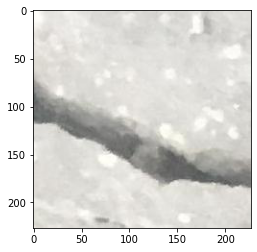

In [10]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [11]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [12]:

ptm.trainable = False

In [13]:

K = len(folders) # number of classes
print(K)
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

2


In [14]:

model = Model(inputs=ptm.input, outputs=x)

In [15]:

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [16]:
gen_train = ImageDataGenerator()

gen_test = ImageDataGenerator()

In [17]:
batch_size = 128


train_generator = gen_train.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)
valid_generator = gen_test.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
start_time = time.time()
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/10
63/63 [==============================] - 3553s 56s/step - loss: 0.4081 - accuracy: 0.9565 - val_loss: 0.0622 - val_accuracy: 0.9955
Epoch 2/10
63/63 [==============================] - 25s 396ms/step - loss: 0.0120 - accuracy: 0.9980 - val_loss: 0.0445 - val_accuracy: 0.9955
Epoch 3/10
63/63 [==============================] - 25s 400ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0461 - val_accuracy: 0.9955
Epoch 4/10
63/63 [==============================] - 26s 412ms/step - loss: 7.2687e-04 - accuracy: 0.9999 - val_loss: 0.0488 - val_accuracy: 0.9950
Epoch 5/10
63/63 [==============================] - 25s 394ms/step - loss: 1.4633e-05 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9950
Epoch 6/10
63/63 [==============================] - 25s 390ms/step - loss: 1.2656e-05 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9950
Epoch 7/10
63/63 [==============================] - 25s 391ms/step - loss: 1.1168e-05 - accuracy: 1.0000 - val_loss: 0.0482 - val_

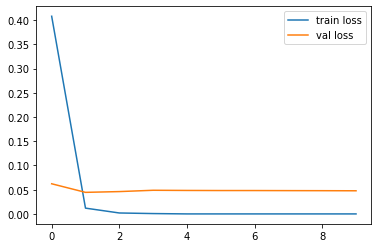

In [20]:
#8:15pm
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_FINAL_vgg16.jpg')
plt.show()

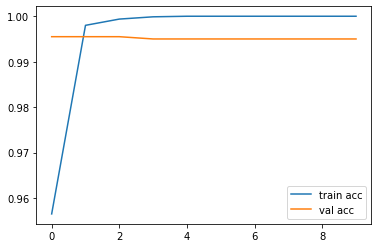

In [21]:

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('acc_FINAL_vgg16.jpg')
plt.show()

In [22]:
model.save('Final_vgg16.h5') 